In [8]:
!pip install python-docx 

  Created wheel for python-docx: filename=python_docx-0.8.11-py3-none-any.whl size=184605 sha256=76c3f01ecca65618d84ee390bad2e19dbc1c862731643a591a2b4244c5ef56e5
  Stored in directory: c:\users\sretenp\appdata\local\pip\cache\wheels\32\b8\b2\c4c2b95765e615fe139b0b17b5ea7c0e1b6519b0a9ec8fb34d
Successfully built python-docx


In [9]:
import networkx as nx
import pandas as pd
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt
from docx import Document
import math #?
import sympy
from sklearn.cluster import SpectralClustering

In [2]:
input_path = "models/SNetF.gml"
G = nx.read_gml(input_path)

In [16]:
def plot_scatterplot(x_data, y_data, x_label, y_label, title):
    fig, ax = plt.subplots()
    ax.scatter(x_data, y_data) 
    ax.set_ylabel(y_label, fontsize=15)
    ax.set_xlabel(x_label, fontsize=15)
    ax.set_title(title)
    plt.show() 

def plot_scatterplot2(x_data, y_data, x_label, y_label, title):
    fig, ax = plt.subplots()
    ax.scatter(x_data, y_data) 
    ax.set_ylabel(y_label, fontsize=15)
    ax.set_xlabel(x_label, fontsize=15)
    ax.set_title(title)
    plt.show() 
    
def find_ccs2(eigenvectors_holder, n):
    components = []
    already_solved = []
    for current in range(0, n):
        if current not in already_solved:
            component = [current]
            for running in range (current+1, n):
                if running not in already_solved:
                    b = True
                    for tracer in range(0, len(eigenvectors_holder)):
                        eigenvector = eigenvectors_holder[tracer]
                        if not in_range(eigenvector[current], eigenvector[running], math.pow(10,-12)):
                            b = False
                    if b:
                        component.append(running)
                        already_solved.append(running)
            already_solved.append(current)
            components.append(component)
    return components

def get_components3(L, component_number):
    
    evals, evecs = linalg.eig(L) # each column of evecs is an eigenvector

    # take only real component of each eigenvalue, because eigenvalues of L are guaranteed to be real 
    evals = evals.real

    # take only real component of each eigenvector, because eigenvectors of L are guaranteed to be real 
    evecs_temp = []
    for e in evecs:
        v = e.real
        evecs_temp.append(v)    
    evecs = evecs_temp
    
    evecs_horizontal_container = np.array(evecs).T #each row is an eigenvector

    zipped = list(zip(evals, evecs_horizontal_container)) # pair eigenvalues and eigenvectors into eigenpairs
    zipped.sort(key=lambda tup: tup[0]) # sort eigenpairs by eigenvalue
    evals, evecs = zip(*zipped) # evecs is now horizontal, but ordered by paired eigenvalue size
    eigenspace0_basis = evecs[:component_number] # take only the first component_number eigenvectors 
    #eigenspace0_basis = filter_matrix(eigenspace0_basis, math.pow(10, -15)) # filter values close to 0

    return find_ccs2(eigenspace0_basis, len(eigenspace0_basis[0]))

     k      lambda_k
0    1 -1.036174e-11
1    2  7.894845e+00
2    3  1.499876e+01
3    4  1.500000e+01
4    5  1.500000e+01
5    6  1.500000e+01
6    7  1.500000e+01
7    8  1.514057e+01
8    9  1.534041e+01
9   10  1.599898e+01
10  11  1.600000e+01
11  12  1.600000e+01
12  13  1.617431e+01
13  14  1.799856e+01
14  15  1.800000e+01
15  16  1.813204e+01
16  17  1.899881e+01
17  18  1.911178e+01
18  19  1.995758e+01
19  20  2.417853e+01
20  21  2.506148e+01
21  22  2.706246e+01
22  23  2.800000e+01
23  24  3.000000e+01
24  25  3.011911e+01
25  26  3.099927e+01
26  27  3.114767e+01
27  28  3.208268e+01
28  29  3.310600e+01
29  30  3.410125e+01


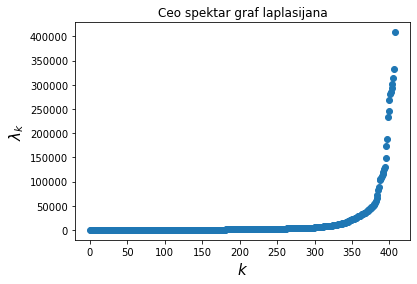

In [20]:
L = nx.laplacian_matrix(G).toarray()

eigenvalues = linalg.eigvalsh(L) # TODO: change to .eigenvalsh because we know the matrix is symmetric
eigenvalues.sort()
enumerator = np.array(range(1, len(eigenvalues)+1))
df_eig = pd.DataFrame(list(zip(enumerator, eigenvalues)))

# write eigenvalue table
df_eig30 = df_eig[:30]
df_eig30.columns = ['k', 'lambda_k']
df_eig30 = df_eig30.astype({'k': 'int32', 'lambda_k':'float'})
print(df_eig30)

doc = Document()
#doc = docx.Document('tabela_eig.docx')
t = doc.add_table(df_eig30.shape[0]+1, df_eig30.shape[1])
t.cell(0,0).text = r'$k$'
t.cell(0,1).text = r'$\lambda_k$'
for i in range(df_eig30.shape[0]):
    for j in range(df_eig30.shape[-1]):
        t.cell(i+1,j).text = str(df_eig30.values[i,j])

plot_scatterplot(enumerator, eigenvalues, r'$k$', r'$\lambda_k$', 'Ceo spektar graf laplasijana')

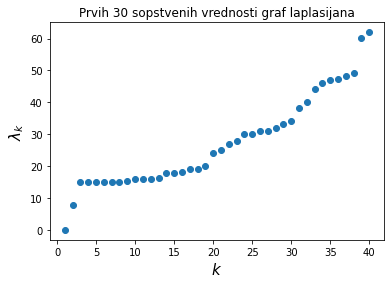

In [22]:
# prvih 30 sopstvenih vrednosti

df_eig_30 = df_eig[:30]

plot_scatterplot(df_eig_30.iloc[:,0], df_eig_30.iloc[:,1], r'$k$', r'$\lambda_k$', 'Prvih 30 sopstvenih vrednosti graf laplasijana')


In [ ]:
#Kandidati za broj klastera: 2,3,10-?,14,20,39